In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from PIL import Image
import cv2
import os

In [3]:
IMG_DIR = '/content/drive/MyDrive/data3a/training/01-minor'

for img in os.listdir(IMG_DIR):
    img_array = cv2.imread(os.path.join(IMG_DIR,img), cv2.IMREAD_GRAYSCALE)

    img_pil = Image.fromarray(img_array)
    img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))

    img_array = (img_28x28.flatten())

    img_array  = img_array.reshape(-1,1).T

    with open('train_01_minor.csv', 'ab') as f:

        np.savetxt(f, img_array, delimiter=",")

In [4]:
IMG_DIR = '/content/drive/MyDrive/data3a/training/02-moderate'

for img in os.listdir(IMG_DIR):
    img_array = cv2.imread(os.path.join(IMG_DIR,img), cv2.IMREAD_GRAYSCALE)

    img_pil = Image.fromarray(img_array)
    img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))

    img_array = (img_28x28.flatten())

    img_array  = img_array.reshape(-1,1).T

    with open('train_02_moderate.csv', 'ab') as f:

        np.savetxt(f, img_array, delimiter=",")

In [5]:
IMG_DIR = '/content/drive/MyDrive/data3a/training/03-severe'

for img in os.listdir(IMG_DIR):
    img_array = cv2.imread(os.path.join(IMG_DIR,img), cv2.IMREAD_GRAYSCALE)

    img_pil = Image.fromarray(img_array)
    img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))

    img_array = (img_28x28.flatten())

    img_array  = img_array.reshape(-1,1).T

    with open('train_03_severe.csv', 'ab') as f:

        np.savetxt(f, img_array, delimiter=",")

In [6]:
train_minor = pd.read_csv("train_01_minor.csv", header=None)

columnnames = {}
count = 0
for i in train_minor.columns:
  count += 1
  columnnames[i] = f"Pix_{count}"
train_minor.rename(columns = columnnames ,inplace = True)

train_minor['label'] = 0

In [7]:
train_moderate = pd.read_csv("train_02_moderate.csv", header=None)

columnnames = {}
count = 0
for i in train_moderate.columns:
  count += 1
  columnnames[i] = f"Pix_{count}"
train_moderate.rename(columns = columnnames ,inplace = True)


train_moderate['label'] = 1

In [8]:
train_severe = pd.read_csv("train_03_severe.csv", header=None)

columnnames = {}
count = 0
for i in train_severe.columns:
  count += 1
  columnnames[i] = f"Pix_{count}"
train_severe.rename(columns = columnnames ,inplace = True)

train_severe['label'] = 2

In [9]:
data=pd.concat([train_minor,train_moderate,train_severe])
data.shape

(5780, 785)

In [10]:
# data = data.astype('float32') 
data.head()

,Pix_1,Pix_2,Pix_3,Pix_4,Pix_5,Pix_6,Pix_7,Pix_8,Pix_9,Pix_10,...,Pix_776,Pix_777,Pix_778,Pix_779,Pix_780,Pix_781,Pix_782,Pix_783,Pix_784,label
0,165.0,165.0,164.0,165.0,166.0,162.0,203.0,150.0,152.0,171.0,...,98.0,96.0,94.0,114.0,124.0,128.0,100.0,106.0,93.0,0
1,60.0,77.0,103.0,115.0,143.0,144.0,148.0,152.0,154.0,155.0,...,121.0,123.0,116.0,111.0,112.0,105.0,106.0,102.0,99.0,0
2,171.0,207.0,150.0,114.0,142.0,121.0,97.0,50.0,51.0,61.0,...,104.0,104.0,106.0,111.0,112.0,111.0,116.0,114.0,115.0,0
3,117.0,115.0,112.0,111.0,108.0,105.0,97.0,76.0,64.0,56.0,...,47.0,57.0,76.0,93.0,87.0,81.0,96.0,138.0,190.0,0
4,107.0,105.0,98.0,113.0,116.0,107.0,109.0,115.0,105.0,114.0,...,42.0,43.0,45.0,48.0,46.0,47.0,104.0,126.0,118.0,0


In [11]:
X_train=data.iloc[:,:-1]
X_train.shape

(5780, 784)

In [12]:
X_train= X_train/255.0

In [13]:
X_train.head()

,Pix_1,Pix_2,Pix_3,Pix_4,Pix_5,Pix_6,Pix_7,Pix_8,Pix_9,Pix_10,...,Pix_775,Pix_776,Pix_777,Pix_778,Pix_779,Pix_780,Pix_781,Pix_782,Pix_783,Pix_784
0,0.647059,0.647059,0.643137,0.647059,0.650980,0.635294,0.796078,0.588235,0.596078,0.670588,...,0.650980,0.384314,0.376471,0.368627,0.447059,0.486275,0.501961,0.392157,0.415686,0.364706
1,0.235294,0.301961,0.403922,0.450980,0.560784,0.564706,0.580392,0.596078,0.603922,0.607843,...,0.482353,0.474510,0.482353,0.454902,0.435294,0.439216,0.411765,0.415686,0.400000,0.388235
2,0.670588,0.811765,0.588235,0.447059,0.556863,0.474510,0.380392,0.196078,0.200000,0.239216,...,0.372549,0.407843,0.407843,0.415686,0.435294,0.439216,0.435294,0.454902,0.447059,0.450980
3,0.458824,0.450980,0.439216,0.435294,0.423529,0.411765,0.380392,0.298039,0.250980,0.219608,...,0.168627,0.184314,0.223529,0.298039,0.364706,0.341176,0.317647,0.376471,0.541176,0.745098
4,0.419608,0.411765,0.384314,0.443137,0.454902,0.419608,0.427451,0.450980,0.411765,0.447059,...,0.149020,0.164706,0.168627,0.176471,0.188235,0.180392,0.184314,0.407843,0.494118,0.462745


In [14]:
print(np.unique(X_train.min()))
print(np.unique(X_train.max()))

[0.]
[0.99215686 0.99607843 1.        ]


In [15]:
X_train.to_csv('data_training.csv')

In [16]:
X_train.head()

,Pix_1,Pix_2,Pix_3,Pix_4,Pix_5,Pix_6,Pix_7,Pix_8,Pix_9,Pix_10,...,Pix_775,Pix_776,Pix_777,Pix_778,Pix_779,Pix_780,Pix_781,Pix_782,Pix_783,Pix_784
0,0.647059,0.647059,0.643137,0.647059,0.650980,0.635294,0.796078,0.588235,0.596078,0.670588,...,0.650980,0.384314,0.376471,0.368627,0.447059,0.486275,0.501961,0.392157,0.415686,0.364706
1,0.235294,0.301961,0.403922,0.450980,0.560784,0.564706,0.580392,0.596078,0.603922,0.607843,...,0.482353,0.474510,0.482353,0.454902,0.435294,0.439216,0.411765,0.415686,0.400000,0.388235
2,0.670588,0.811765,0.588235,0.447059,0.556863,0.474510,0.380392,0.196078,0.200000,0.239216,...,0.372549,0.407843,0.407843,0.415686,0.435294,0.439216,0.435294,0.454902,0.447059,0.450980
3,0.458824,0.450980,0.439216,0.435294,0.423529,0.411765,0.380392,0.298039,0.250980,0.219608,...,0.168627,0.184314,0.223529,0.298039,0.364706,0.341176,0.317647,0.376471,0.541176,0.745098
4,0.419608,0.411765,0.384314,0.443137,0.454902,0.419608,0.427451,0.450980,0.411765,0.447059,...,0.149020,0.164706,0.168627,0.176471,0.188235,0.180392,0.184314,0.407843,0.494118,0.462745


In [17]:
y_train=data.iloc[:,-1]
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [18]:
X_train.shape,y_train.shape

((5780, 784), (5780,))

In [19]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np

total_clusters = len(np.unique(y_train))
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(X_train)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(n_clusters=3)

In [20]:
np.unique(kmeans.labels_)

array([0, 1, 2], dtype=int32)

In [21]:
np.unique(y_train)

array([0, 1, 2])

In [22]:
y_train.dtype

dtype('int64')

In [68]:
def retrieve_info(cluster_labels,y_train):
  '''
  Associates most probable label with each cluster in KMeans model
  returns: dictionary of clusters assigned to each label
  '''
  # Initializing

  reference_labels = {}
  # For loop to run through each label of cluster label
  for i in range(len(np.unique(kmeans.labels_))):
    
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num

  
  return reference_labels


In [24]:
#print(reference_labels)
number_labels = np.random.rand(len(kmeans.labels_))
len(number_labels)

5780

In [69]:
# reference_labels = retrieve_info(kmeans.labels_,y_train)
# number_labels = np.random.rand(len(kmeans.labels_))
# for i in range(len(kmeans.labels_)):
#   number_labels[i] = reference_labels[kmeans.labels_[i]]
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]

IndexError: ignored

In [36]:
len(kmeans.labels_),len(y_train)

(5780, 5780)

In [26]:
y_train=y_train.to_numpy()

In [27]:
# Comparing Predicted values and Actual values
print(number_labels[:20].astype(int))
print(y_train[:20])

[0 0 2 2 2 2 2 2 0 2 0 2 2 2 0 0 0 0 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [28]:
type(number_labels), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [29]:
# Calculating accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,y_train))

0.34584775086505193


In [30]:
# Function to calculate metrics for the model
import sklearn.metrics as metrics

def calculate_metrics(model,output):
  print('Number of clusters is {}'.format(model.n_clusters))
  #Higher the number of clusters, lower is the inertia score.
  print('Inertia : {}'.format(model.inertia_))
  #Homogeneity is a measure of data points of a particular cluster belonging to a single class.
  print('Homogeneity : {}'.format(metrics.homogeneity_score(output,model.labels_)))




In [31]:
#kmeans.labels_ = kmeans.labels_.astype('float32') 

print(np.unique(kmeans.labels_))
print(np.unique(y_train))



[0 1 2]
[0 1 2]


In [39]:
cluster_number = [10,16,36,64,144,255]
for i in cluster_number:
  total_clusters = len(np.unique(y_train))
# Initialize the K-Means model
  kmeans = MiniBatchKMeans(n_clusters = i)
# Fitting the model to training set
  kmeans.fit(X_train)
# Calculating the metrics
 
  calculate_metrics(kmeans,y_train)
# Calculating reference_labels
  reference_labels = retrieve_info(kmeans.labels_,y_train)
# ‘number_labels’ is a list which denotes the number displayed in image
  number_labels = np.random.rand(len(kmeans.labels_))

  for i in range(len(kmeans.labels_)):
 
    number_labels[i] = reference_labels[kmeans.labels_[i]]
 
  print('Accuracy score : {}'.format(accuracy_score(number_labels,y_train)))
  print('\n')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 10
Inertia : 202331.07440613362
Homogeneity : 0.020814110760981736
Accuracy score : 0.40986159169550174




/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 16
Inertia : 191739.37213920633
Homogeneity : 0.02855636123885265
Accuracy score : 0.41366782006920416




/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 36
Inertia : 177081.50898962474
Homogeneity : 0.03437875395842674
Accuracy score : 0.4134948096885813




/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 64
Inertia : 166196.93657710915
Homogeneity : 0.06731877752543865
Accuracy score : 0.4655709342560554




/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 144
Inertia : 150608.17430575553
Homogeneity : 0.13127430760605127
Accuracy score : 0.5019031141868512




/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 255
Inertia : 132263.60425062757
Homogeneity : 0.19867057237498426
Accuracy score : 0.5288927335640139




In [40]:
IMG_DIR = '/content/drive/MyDrive/data3a/validation/01-minor'

for img in os.listdir(IMG_DIR):
    img_array = cv2.imread(os.path.join(IMG_DIR,img), cv2.IMREAD_GRAYSCALE)

    img_pil = Image.fromarray(img_array)
    img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))

    img_array = (img_28x28.flatten())

    img_array  = img_array.reshape(-1,1).T

    with open('validation_01_minor.csv', 'ab') as f:

        np.savetxt(f, img_array, delimiter=",")

IMG_DIR = '/content/drive/MyDrive/data3a/validation/02-moderate'

for img in os.listdir(IMG_DIR):
    img_array = cv2.imread(os.path.join(IMG_DIR,img), cv2.IMREAD_GRAYSCALE)

    img_pil = Image.fromarray(img_array)
    img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))

    img_array = (img_28x28.flatten())

    img_array  = img_array.reshape(-1,1).T

    with open('validation_02_moderate.csv', 'ab') as f:

        np.savetxt(f, img_array, delimiter=",")

IMG_DIR = '/content/drive/MyDrive/data3a/validation/03-severe'

for img in os.listdir(IMG_DIR):
    img_array = cv2.imread(os.path.join(IMG_DIR,img), cv2.IMREAD_GRAYSCALE)

    img_pil = Image.fromarray(img_array)
    img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))

    img_array = (img_28x28.flatten())

    img_array  = img_array.reshape(-1,1).T

    with open('validation_03_severe.csv', 'ab') as f:

        np.savetxt(f, img_array, delimiter=",")

In [41]:
validation_minor = pd.read_csv("validation_01_minor.csv", header=None)

columnnames = {}
count = 0
for i in validation_minor.columns:
  count += 1
  columnnames[i] = f"Pix_{count}"
validation_minor.rename(columns = columnnames ,inplace = True)

validation_minor['label'] = 0

validation_moderate = pd.read_csv("validation_02_moderate.csv", header=None)

columnnames = {}
count = 0
for i in validation_moderate.columns:
  count += 1
  columnnames[i] = f"Pix_{count}"
validation_moderate.rename(columns = columnnames ,inplace = True)


validation_moderate['label'] = 1

validation_severe = pd.read_csv("validation_03_severe.csv", header=None)

columnnames = {}
count = 0
for i in validation_severe.columns:
  count += 1
  columnnames[i] = f"Pix_{count}"
validation_severe.rename(columns = columnnames ,inplace = True)

validation_severe['label'] = 2

In [42]:
data=pd.concat([validation_minor,validation_moderate,validation_severe])
data.shape

(744, 785)

In [43]:
X_test=data.iloc[:,:-1]
X_test.shape
y_test=data.iloc[:,-1]
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [44]:
y_test=y_test.to_numpy()

In [45]:
len(kmeans.labels_)
len(y_test)

744

In [46]:
kmeans.labels_.dtype,y_test.dtype,y_train.dtype

(dtype('int32'), dtype('int64'), dtype('int64'))

In [47]:
type(kmeans.labels_),type(y_test)

(numpy.ndarray, numpy.ndarray)

In [48]:
len(kmeans.labels_), 

5780

In [49]:
print(np.unique(kmeans.labels_))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [86]:
def retrieve_info(cluster_labels,y_test):
  '''
  Associates most probable label with each cluster in KMeans model
  returns: dictionary of clusters assigned to each label
  '''
  # Initializing

  reference_labels = {}
  # For loop to run through each label of cluster label
  for i in range(len(np.unique(kmeans.labels_))):
    
    index = np.where(cluster_labels == i,0,1)
    num = np.bincount(y_test[index==1]).argmax()
    reference_labels[i] = num

  
  return reference_labels

In [72]:
len(number_labels),len(y_test)

(744, 744)

In [71]:
len(np.unique(kmeans.labels_))

240

In [77]:
(len(np.unique(kmeans.labels_)))

240

In [82]:
index = np.where(kmeans.labels_ == i,0,1)
y_test[index==1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [83]:
index

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [87]:
reference_labels = retrieve_info(kmeans.labels_,y_test)


In [55]:
kmeans = MiniBatchKMeans(n_clusters = 246)
kmeans.fit(X_test)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(n_clusters=246)

In [61]:
len(number_labels)

744

In [93]:
# Testing model on Testing set
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = 246)
# Fitting the model to testing set
kmeans.fit(X_test)
# Calculating the metrics
calculate_metrics(kmeans,y_test)
# Calculating the 
reference_labels = retrieve_info(kmeans.labels_,y_test)
# ‘number_labels’ is a list which denotes the number displayed in image
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
 
 number_labels[i] = reference_labels[kmeans.labels_[i]]
 
print('Accuracy score : {}'.format(accuracy_score(number_labels,y_test)))
print('\n')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 246
Inertia : 12980487.538221154
Homogeneity : 0.9897946350570753


KeyError: ignored

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: Futur

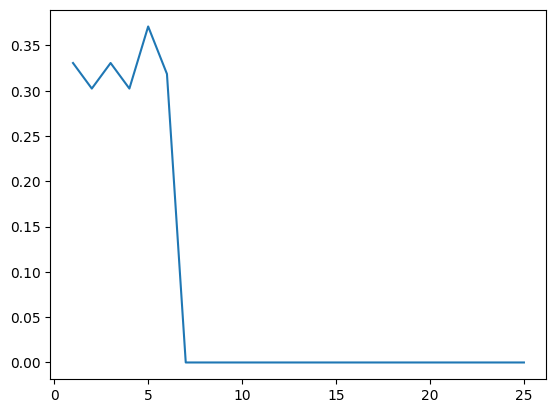

In [95]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

k_range = list(range(1, 26))
scores = []
for i in k_range:
    knn = MiniBatchKMeans(n_clusters=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.show()

In [97]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

In [104]:
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations


In [101]:
kf = KFold(n_splits=5, shuffle=False).split(range(30))
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]       [0 1 2 3 4 5]      
    2     [ 0  1  2  3  4  5 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]    [ 6  7  8  9 10 11]   
    3     [ 0  1  2  3  4  5  6  7  8  9 10 11 18 19 20 21 22 23 24 25 26 27 28 29]    [12 13 14 15 16 17]   
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 24 25 26 27 28 29]    [18 19 20 21 22 23]   
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]    [24 25 26 27 28 29]   


In [105]:
from sklearn.model_selection import cross_val_score

knn = MiniBatchKMeans(n_clusters=5)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print(scores)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: Futur

[0.12456747 0.19204152 0.24221453 0.16782007 0.15570934 0.19723183
 0.24048443 0.29411765 0.16608997 0.23010381]


In [106]:
print(scores.mean())

0.20103806228373697


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: Futur

[0.32698961937716264, 0.3333910034602076, 0.3373702422145329, 0.2622837370242214, 0.17231833910034602, 0.15138408304498271, 0.1833910034602076, 0.10899653979238752, 0.10570934256055364, 0.11505190311418685, 0.09515570934256055, 0.10103806228373702, 0.05501730103806228, 0.06660899653979238, 0.06643598615916954, 0.04861591695501729, 0.06159169550173009, 0.04221453287197231, 0.03650519031141868, 0.05951557093425606, 0.04065743944636678, 0.04671280276816609, 0.04273356401384083, 0.052076124567474055, 0.047577854671280284, 0.059861591695501724, 0.041003460207612454, 0.03806228373702422, 0.02923875432525951, 0.03200692041522492]


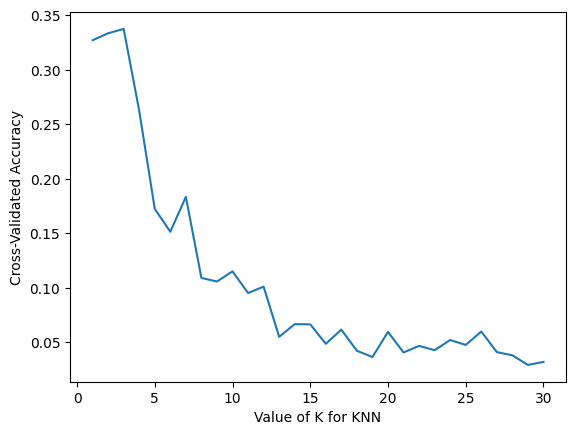

In [111]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = MiniBatchKMeans(n_clusters=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()